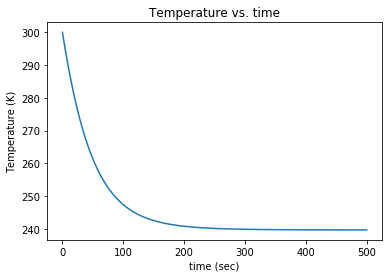

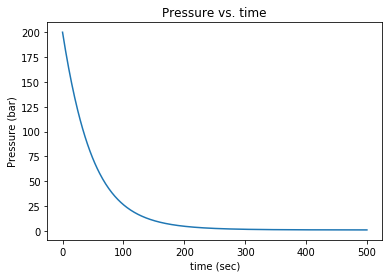

In [21]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Nov 14 11:00 2018

solve_ODEs_CHE8040_HW5.py 
%  system obeys VDW EOS
%  ouput is pressure and temperature in Pa and K, respectively 

@author: nguyenedalgo

"""

import numpy as np 
from scipy.integrate import odeint
import matplotlib.pyplot as plt

#=================================================================

def ODEs_HW5(m_and_T,tRange):
    """
    %% Description of Input and output parameters or varibales:
        % V_bar : extensive property of volume occupied by the gas in the container
        % R     : gas constant 
        % p 	: pressure
        % T 	: temperature
        % m 	: mass
        % t 	: time 

    %% Units of Input and output parameters or varibales:
        % V_bar : m3
        % R     : J/mol-K
        % p 	: bar
        % T 	: K
        % m 	: mol
        % t 	: sec 

    """
    
    # Unpack mass and temperature into descriptive variable
    m = m_and_T[0];
    T = m_and_T[1];
    
    # All parameters
    co = 0.8;
    ao = 1e-3;        #m2
    f = 0.5;          #mol K s-1 Pa-1 m-2
    p_atm = 1.01325;  #bar 
    To = 300;         #K
    Po = 200          #bar 
    Cp = 29;          #J mol-1 K-1
    R  = 8.314;       # J mol-1 K-1
    a = 3.655505e+06*1e-12        #m6 bar mol-2
    b = 4.282428e+01*1e-6         #m3 mol-1
    
    # Solve for V
    VDW = np.poly1d([1, - (83.14*1e-6*To/Po + b), a/Po, - a*b/Po])
    roots = np.real(VDW.r) 
    #print(roots)
    V = roots[2]        #m3 mol-1
    
    # All algebraic eq
    Cv = Cp-R;       #J/mol-K
    P = 83.14*1e-6*T / (V-b) - a / V**2  #bar
    m_dot = co*ao*f*(P-p_atm)*1e5/T;   
    
    ## define ODEs 
    dm_dt = -m_dot;
    dT_dt = -m_dot / (m*(Cp-R)) * (R*T*V / (V-b) - a/V*1e5)

    return dm_dt, dT_dt

#=================================================================

## Setup initital conditions for the ODE solver
a = 3.655505e+06*1e-12        #m6 bar mol-2
b = 4.282428e+01*1e-6         #m3 mol-1
R  = 83.14*1e-6               #m3 bar mol-1 K-1

V_bar = 0.1         #m3
Po = 200;           #bar
To = 300  ;         #K

VDW = np.poly1d([1, - (R*To/Po + b), a/Po, - a*b/Po])
roots = np.real(VDW.r) 
#print(roots)
V = roots[2]     #m3 mol-1

mo = V_bar / V                   #mol
IC = mo, To;    

## Define the step size
to = 0; tf = 500;
tRange = np.arange(to, tf+1, 1)

# Call odeint to solve ODEs
soln=odeint(ODEs_HW5, IC, tRange, args = ())

#Output vectors of numerators for each value of the denominator in the t
m = soln[:,0]               #mol
T = soln[:,1]               #K
P = R*T / (V-b) - a / V**2; #bar 

## Figure 1: Plot the results of T vs. t 
plt.figure(1)
plt.plot(tRange,T)

plt.title('Temperature vs. time')
plt.xlabel('time (sec)')
plt.ylabel('Temperature (K)')
plt.show()


## Figure 2: Plot the results of p vs.  t
plt.figure(2)
plt.plot(tRange,P)

plt.title('Pressure vs. time')
plt.xlabel('time (sec)')
plt.ylabel('Pressure (bar)')
plt.show()
